# Functions to export

In [6]:
def save_figure(ax, title):
    '''Save the figure in the reports/figures folder in the format: title_string.png'''
    
    fig = ax.get_figure() 
    filename = '_'.join(title.split(' ')).lower()
    fig.savefig("../reports/figures/{}.png".format(filename))  

In [7]:
def plot_training_loss(loss, title='Training Loss'):
    '''Plot the loss on the training data, across each epoch'''
    # Set figure
    sns.set(rc={'figure.figsize':(12,6)},style="white", context="talk")
    
    # Plot
    epochs = range(1, len(loss) + 1)
    ax = sns.scatterplot(x=epochs, y=loss, color='darkred');
    
    # Title and Axis
    ax.set_title(title)
    ax.set_xlabel('Number of Epochs')
    ax.set_ylabel('Loss')
    sns.despine()
    
    max_loss = max(loss)
    min_loss = min(loss)
    loss_reduction = max_loss - min_loss
    loss_reductions_pct = round((loss_reduction / max_loss) * 100,2)
    print('We have reduced the loss by {}% by training the model through {} epochs'.format(loss_reductions_pct, len(loss)))
    
    # Save the figure
    save_figure(ax, title)

In [8]:
def plot_training_accuracy(acc, history_mod, title='Training Accuracy'):
    '''Plot the accuracy on the training data, across each epoch'''
    # Set figure
    sns.set(rc={'figure.figsize':(12,6)},style="white", context="talk")
    
    # Plot
    epochs = range(1, len(acc) + 1)
        # Dataframe for the regplot
    df = pd.DataFrame({'acc': history_mod.history['acc'], 'epochs': range(1, len(epochs) + 1)})
    ax = sns.regplot(x='epochs', y='acc', data=df, fit_reg=False)

    # Title and Axis
    ax.set_title(title)
    ax.set_xlabel('Number of Epochs')
    ax.set_ylabel('Model Accuracy')
    sns.despine()
    
    # Calculate the change in Accuracy
    max_acc = max(acc)
    min_acc = min(acc)
    acc_increase = max_acc - min_acc
    acc_increase_pct = round((acc_increase / min_acc) * 100,2)
    print('We have increased the accuracy by {}% by training the model through {} epochs'.format(acc_increase_pct, len(acc)))
    
    # Save the figure
    save_figure(ax, title)

In [9]:
def plot_training_and_validation_accuracy(acc, val_acc, history_mod,
                                          title='Training and Validation Accuracy',
                                          y_lim=(0,1), mov_avg_n=25,
                                          show_mov_avg=False):
    '''Plot the accuracy on the training data and the validation data, across each epoch'''
    # Set figure
    sns.set(rc={'figure.figsize':(12,6)},style="white", context="talk")
    
    # Plot
    epochs = range(1, len(acc) + 1)
        # Dataframe for the regplot
    df = pd.DataFrame({'acc': history_mod.history['acc'], 'val_acc': history_mod.history['val_acc'], 'val_acc_avg': 0, 'epochs': range(1, len(epochs) + 1)})
        # Plot Training and Validation Accuracy
    ax = sns.regplot(x='epochs', y='acc', data=df, color='blue', label='Training', fit_reg=False, marker='.')
    ax2 = sns.regplot(x='epochs', y='val_acc', data=df, color='forestgreen', label='Validation', fit_reg=False, marker='.')
        # Plot Moving Average    
    if show_mov_avg:
        val_acc_avg = np.convolve(history_mod.history['val_acc'], np.ones((mov_avg_n,))/mov_avg_n, mode='valid') # Moving average of 3
        df['val_acc_avg'][mov_avg_n-1:] = list(val_acc_avg)
        ax3 = sns.regplot(x='epochs', y='val_acc_avg', data=df, color='orange', label='Validation Moving Avg ({} epochs)'.format(mov_avg_n), fit_reg=False, marker='.')

    # Title and Axis
    ax.set_title(title, fontsize='large', pad=20)
    ax.set_xlabel('Number of Epochs')
    ax.set_ylabel('Accuracy')
    ax.set_ylim(bottom=y_lim[0], top=y_lim[1])
    ax.legend()
    sns.despine()
    
    # Calculate the change in Accuracy
    max_acc = max(acc)
    min_acc = min(acc)
    acc_increase = max_acc - min_acc
    acc_increase_pct = round((acc_increase / min_acc) * 100,2)
    print('We have increased the accuracy by {}% by training the model through {} epochs'.format(acc_increase_pct, len(acc)))
    
    # Save the figure
    save_figure(ax, title)

In [10]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    '''Plot the confusion matrix of predictions (can be normalized)'''
    
    # Add Normalization Option
    if normalize:
        cm = cm.astype('float') / cm.sum()
        print("Normalized confusion matrix\n")
    else:
        print('Confusion matrix, without normalization\n')
#     print(cm)

    # Plot
    ax = plt.imshow(cm, interpolation='nearest', cmap=cmap)

    # Make Pretty
    plt.title('{}\n'.format(title))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    fmt = '.2f' if normalize else 'd'
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black")
        
    # Save the figure
    save_figure(ax, title)

In [11]:
def acc_by_k_value(X_train, y_train, X_test, y_test, k_range_min=1, k_range_max=30, title='Accuracy of KNN, by Number of Neighbors'):
    '''Calculates the Accuracy score at each k-value and plots a visualization'''
    
    # List of k-scores
    k_range = list(range(k_range_min, k_range_max))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_predict = knn.predict(X_test)
        score = metrics.accuracy_score(y_test, y_predict, normalize=True)
        k_scores.append( score)
    k_df = pd.DataFrame({'k_range': k_range, 'k_scores': k_scores})
    
    # Plot
        # Set figure
    sns.set(rc={'figure.figsize':(12,6)},style="white", context="talk")
        # Scatter Plot
    ax = sns.scatterplot(k_range, k_scores)
        # Title and Axis
    ax.set_title(title)
    ax.set_xlabel('Number of neighbors (K)')
    ax.set_ylabel('Accuracy Score')
#     ax.set_ylim(0.55,0.65)
    sns.despine()
        # Place horizontal line
    best_k_score = max(k_scores)
    optimal_k = k_scores.index(best_k_score)+1
    plt.axhline(xmax=(optimal_k-1)/len(k_range), y=best_k_score, ls="--", lw=3, c='r')
    plt.axvline(x=optimal_k , ymax=best_k_score+0.25, ls="--", lw=3, c='r', label='Optimal K Value')

    print('Highest Accuracy is {}%, when K is {}'.format(round(best_k_score*100,2), optimal_k))

    # Save the figure
    save_figure(ax, title)

In [12]:
def f1_by_k_value(X_train, y_train, X_test, y_test, krange_min=1,krange_max=50, title='F1 score by K Value'):
    '''calculate the F1 score by k-value and plot a visualization'''
    # Build list of k-scores
    k_range = list(range(krange_min, krange_max))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_predict = knn.predict(X_test)
        score = metrics.f1_score(y_test, y_predict, average='weighted')
        k_scores.append( score)
    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',
             markerfacecolor='blue', markersize=10)
    plt.title(title)
    plt.xlabel('K Value')
    plt.ylabel('F1 Score')
    plt.show()
    
    # Save the figure
    save_figure(ax, title)

In [13]:
def plot_feature_importance(importances, indices, features_to_show=10, title='Top {} Feature Importances'):
    '''Plot the importances of features in a dataset'''
    sns.set(rc={'figure.figsize':(12,6)},style="white", context="talk")

    ax = sns.barplot(importances[indices][:features_to_show],
                     features[indices][:features_to_show],
                     color='forestgreen')

    # Title and Axis
    ax.set_title(title.format(features_to_show))
    ax.set_xlabel('Importance')
    ax.set_ylabel('Feature')
    sns.despine()

    # Save the figure
    save_figure(ax, title)

In [14]:
def plot_explained_variance(X_train_std, features_to_show=45, title='Total and Explained Variance'):
    '''Calculates the eigen values and eigen vectors in order to plot the explained variance of each principal component'''
    
    # Compute the covariance matrix of the standardized training dataset
    cov_mat = np.cov(X_train_std.T)
    eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
    
    # Compute cumulative sum of the explained variances
    tot = sum(eigen_vals)
    var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
    cum_var_exp = np.cumsum(var_exp)
    
    # Plot Explained Variance with step function
        # Set figure
    sns.set(rc={'figure.figsize':(12,6)},style="white", context="talk")
        # Plot
    ax = sns.barplot(list(range(1, len(eigen_vals)+1)), var_exp, color='royalblue', label='Individual Explained Variance')
    sns.lineplot(range(1, len(eigen_vals)+1), cum_var_exp, drawstyle='steps-pre', color='royalblue', label='Cumulative Explained Variance')
        # Title and Axis
    ax.set_title(title, fontsize='large', pad=20)
    ax.set_xlabel('Principal Component Index')
    ax.set_xticklabels(range(1, features_to_show+1))
    # ax.set_xticks(ticks=range(45))
    ax.set_xlim(left=-0.5, right=features_to_show-0.5)
    ax.set_ylabel('Explained Variance Ratio')
    ax.set_ylim(top=cum_var_exp[features_to_show-1])
    ax.legend(loc='upper left')
    sns.despine()

    # Print cumulative results
    print('The top {} principal components explains {}% of the variance'.format(features_to_show,round(cum_var_exp[features_to_show-1]*100, 2)))
    
    # Save figure
    save_figure(ax, title)

In [61]:
def model_knn(X_train_, n_neighbors=5, save_results=True):
    '''Performs a K Nearest Neighbours algorithm and returns the Accuracy of the model.  
    Also updates the model summary df'''
    
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_, y_train)

    # Class prediction for testing data
    features_used = X_train_.shape[1]
    y_pred_class = knn.predict(X_test_std[:,:features_used])

    # Print Results
    knn_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Accuracy for K-Nearest Neighbors model (k = {}): {}%'.format(n_neighbors, round(knn_accuracy*100,1)))
    
    # Add KNN results to models summary dataframe
    if save_results:
        models_summary['KNN'] = [knn_accuracy]

In [812]:
def model_logreg(C_, X_train_, y_train_, X_test_, y_test_):
    '''Performs a Logistic Regression on the '''
    
    logreg = LogisticRegression(C = C_, solver='lbfgs', random_state=123)
    model_log = logreg.fit(X_train_, y_train_)

    # Predict
    y_pred_class = logreg.predict(X_test_)
    lr_accuracy = metrics.accuracy_score(y_test_, y_pred_class)

    print('Accuracy for Logistic Regression model: {}%'.format(round(lr_accuracy*100,1)))

    # Save to models_summary dataframe
    models_summary['Logistic Regression'] = lr_accuracy

In [819]:
def model_logreg_grid(X_train_, y_train_):    
    '''Uses a pipeline and Gridsearch for Logistic Regression to output the optimal hyperparameters'''
    
    # Construct pipeline
    pipe_lr = Pipeline([('scl', StandardScaler()),
                ('clf', LogisticRegression(fit_intercept=False, random_state=123, solver='lbfgs'))])

    # Set grid search params
    param_grid_logreg = {'clf__C':np.logspace(-3,3,7)
    }

    # Construct grid search
    gs_lr = GridSearchCV(estimator=pipe_lr,
                param_grid=param_grid_logreg,
                scoring='accuracy',
                cv=5,
                verbose=1,
                return_train_score = True,
                n_jobs=-1)

    # Fit using grid search
    gs_lr.fit(X_train_, y_train)

    # Best accuracy
    print('Best Accuracy: {}%'.format(round(gs_lr.best_score_ * 100, 2)))

    # Best params
    print('\nBest params:\n', gs_lr.best_params_)

In [127]:
def model_random_forest(X_train_, y_train_, X_test_, y_test_,
                        max_depth_, min_samples_leaf_, min_samples_split_,
                        n_estimators_,
                        save_to_models_summary=True, plot_importances=False):
    '''Performs a Random Forest Classification on the dataset'''
    clf = RandomForestClassifier(max_depth=max_depth_, min_samples_leaf=min_samples_leaf_, 
                             min_samples_split=min_samples_split_, n_estimators=n_estimators_, random_state=123)
    clf.fit(X_train_, y_train_)
    y_pred = clf.predict(X_test_)
    
    # Print Results
    rf_accuracy = metrics.accuracy_score(y_test_, y_pred)
    print('Accuracy for Random Forest model : {}%'.format(round(rf_accuracy*100,1)))
    
    # Update models_summary table
    if save_to_models_summary:
        models_summary['Random Forest'] = metrics.accuracy_score(y_test_, y_pred)
        
    # Plot the most important features
    features = X_train_.columns
    # importances = sorted(forest.feature_importances_, reverse=True)
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]
    if plot_importances:
        plot_feature_importance(importances, indices, features_to_show)

In [16]:
def model_ada_boost(X_train_, y_train_, X_test_, y_test_, learning_rate, n_estimators, update_models_summary=True):    
    '''Fits a Ada Boost algorithm to the dataset and updates the models_summary '''
    
    clf = AdaBoostClassifier(learning_rate=learning_rate, n_estimators=n_estimators)
    clf.fit(X_train_, y_train_)
    y_pred = clf.predict(X_test_)
    if update_models_summary:
        models_summary['Ada Boost'] = accuracy_score(y_test_, y_pred)
    
    return accuracy_score(y_test_, y_pred)

In [17]:
def model_gradient_boost(X_train, y_train, X_test, y_test, update_models_summary=True):    
    '''Fits a Gradient Boost algorithm to the dataset and updates the models_summary '''
    
    clf = GradientBoostingClassifier(n_estimators=100)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    if update_models_summary:
        models_summary['Gradient_Boost'] = accuracy_score(y_test, y_pred)
    
    return accuracy_score(y_test, y_pred)

In [52]:
def model_baseline(y_train_):
    '''Calculate the majority class and use the Zero Rule for a baseline model'''
    # Calculate the number of times each fighter (1 and 2) won a bout
    f1_wins = y_train_.value_counts()[1]
    f2_wins = y_train_.value_counts()[0]
    print('Fighter 1 wins: {}\nFighter 2 wins: {}'.format(f1_wins, f2_wins))

    # Work out which outcome is in the majority
    f1_wins_pct = y_train_.value_counts(normalize=True)[1]
    f2_wins_pct = y_train_.value_counts(normalize=True)[0]
    if f1_wins > f2_wins:
        print('\nOur Baseline Model will always predict Fighter 1 wins')
        majority_wins_pct = f1_wins_pct  
    else:
        print('\nOur Baseline Model will always predict Fighter 2 wins')
        majority_wins_pct = f2_wins_pct

    print('Null Rate: {}%'.format(round(majority_wins_pct*100, 2)))

    # Save the Baseline Model to our models summary dataframe
    models_summary['Baseline'] = [majority_wins_pct]

In [59]:
def model_knn_grid(X_train_, y_train_):
    '''Uses a pipeline and Gridsearch for K-Nearest Neighbors to output the optimal hyperparameters'''
    
    # Build Pipeline
    pipe_knn = Pipeline([('scl', StandardScaler()), 
                         ('clf', KNeighborsClassifier(n_jobs=-1))
                        ]
                       )
    
    # Only select odd number of neighbors
    param_grid_knn = [
        {'clf__n_neighbors': list(range(3,25,2))}
    ]

    # Build GridSearch
    gs_knn = GridSearchCV(estimator=pipe_knn,
                param_grid=param_grid_knn,
                scoring='accuracy',
                cv=5, 
                verbose=0, 
                return_train_score = True)

    # Fit using grid search
    gs_knn.fit(X_train_, y_train_)

    # Best accuracy
    print('Best Accuracy: {}%'.format(round(gs_knn.best_score_ * 100, 2)))

    # Best params
    print('\nBest Params:\n', gs_knn.best_params_)

In [102]:
def rename_top_features(X_train_):
    '''Renames the top 10 features of our dataset to more understandable labels'''
    top_features = ['fighter1_win_rate', 'fighter2_win_rate', 'fighter2_slpm',
                    'fighter1_slpm', 'fighter2_td_def', 'fighter1_win', 
                    'fighter1_td_def', 'fighter2_str_def', 'fighter1_str_def', 'fighter2_win', 'fighter2_td_acc']  


    feature_labels = ["Fighter 1 Win Rate", "Fighter 2 Win Rate", "Fighter 2 Strikes Landed Per Minute",
                      "Fighter 1 Strikes Landed Per Minute", "Fighter 2 Take-Down Defence",
                      "Fighter 1 Total Wins", "Fighter 1 Take-Down Defence", "Fighter 2 Strike Defence",
                      "Fighter 1 Strike Defence", "Fighter 2 Total Wins", "Fighter 2 Take-Down Accuracy"]

    features_renamed = dict(zip(top_features, feature_labels))

    X_train_ = X_train_.rename(features_renamed, axis=1)
    return X_train_.rename(features_renamed, axis=1)

In [824]:
def model_rf_grid(X_train_, y_train):    
    '''Uses a pipeline and Gridsearch for Random Forest to output the optimal hyperparameters'''
    
    pipe_rf = Pipeline([('clf', RandomForestClassifier(random_state = 123,
                                                       n_jobs=-1
                                                      )
                        )
                       ]
                      )

    # Set grid search params
    param_grid_forest = [ 
      {'clf__n_estimators': [100, 110, 120],
       'clf__max_depth': [4, 5, 6],  
       'clf__min_samples_leaf':[0.05 ,0.1],  
       'clf__min_samples_split':[0.05 ,0.1]
      }
    ]

    # Construct grid search
    gs_rf = GridSearchCV(estimator=pipe_rf,
                param_grid=param_grid_forest,
                scoring='accuracy',
                cv=5, 
                verbose=1, 
                return_train_score = True)

    # Fit using grid search
    gs_rf.fit(X_train_, y_train)

    # Best accuracy
    print('Best accuracy: {:3f}'.format(gs_rf.best_score_))

    # Best params
    print('\nBest params:\n', gs_rf.best_params_)

    # Save to models_summary dataframe
    models_summary['Random Forest'] = gs_rf.best_score_

In [1]:
def model_xgb_grid(X_train_, y_train_, X_test_, y_test_):    
    '''Uses a pipeline and Gridsearch for Random Forest to output the optimal hyperparameters'''
    
    # Construct pipeline
    clf = xgb.XGBClassifier()

    # Set grid search params
    param_grid = {
        "learning_rate": [0.1, 0.01],
        'max_depth': [4,5,6],
        'min_child_weight': [10],
        'subsample': [0.7],
        'n_estimators': [100, 150, 200]
    }

    grid_clf = GridSearchCV(clf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    grid_clf.fit(X_train_, y_train_)

    best_parameters = grid_clf.best_params_
    print("Grid Search found the following optimal parameters: \n", best_parameters)
#     for param_name in sorted(best_parameters.keys()):
#         print("{:25s} {}".format(param_name, best_parameters[param_name]))

    training_preds = grid_clf.predict(X_train_)
    val_preds = grid_clf.predict(X_test_)
    training_accuracy = accuracy_score(y_train_, training_preds)
    val_accuracy = accuracy_score(y_test_, val_preds)

    print("")
    print("Training Accuracy:\t {:.4}%".format(training_accuracy * 100))
    print("Validation Accuracy:\t {:.4}%".format(val_accuracy * 100))


# Data Modeling - [Your Project Name Here]

## Local Code Imports - Do not delete

In [1]:
# DO NOT REMOVE THESE
%load_ext autoreload
%autoreload 2

In [2]:
# DO NOT REMOVE This
%reload_ext autoreload

In [3]:
## DO NOT REMOVE
## import local src module -
## src in this project will contain all your local code
## clean_data.py, model.py, visualize.py, custom.py
from src import make_data as mk
from src import visualize as viz
from src import model as mdl
from src import pandas_operators as po

def test_src():
    mk.test_make_data()
    viz.test_viz()
    mdl.test_model()
    po.test_pandas()
    
    return 1

In [4]:
test_src()

In make_data
In Visualize
In Model
In pandas ops


1

## Code Imports

In [115]:
# For Dataframes and arrays
import numpy as np
import pandas as pd
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing Data
    # Train:Test split
from sklearn.model_selection import train_test_split
    # Scaling
from sklearn.preprocessing import StandardScaler
    # Feature Extraction
from sklearn.decomposition import PCA

# Modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

# Neural Network
import tensorflow as tf
import keras
from keras.layers import Dense, Dropout, Activation, LeakyReLU
from keras.models import Sequential
from keras.optimizers import SGD

# Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools

# Warnings
# import warnings
# warnings.filterwarnings("ignore")

# Set random seeds
np.random.seed(123)
tf.set_random_seed(123)

In [14]:
# !conda install py-xgboost

WARNING conda.base.context:use_only_tar_bz2(632): Conda is constrained to only using the old .tar.bz2 file format because you have conda-build installed, and it is <3.18.3.  Update or remove conda-build to get smaller downloads and faster extractions.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.5
  latest version: 4.7.10

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /anaconda3/envs/ml-ufc-env

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.6.16          |           py36_1         155 KB
    ------------------------------------------------------------
                                           Total:         155 KB

The following packages will be UPDATED:

  certifi                                 

# Project Overview

We have decided not to use the perceptron algorithm because our data set is not perfectly linearly separable, and so the algorithm will never converge.  

### Using OvR Logistic Regression for multi-class classification
Logistic regression models only really work for binary classification tasks, limiting us to only predicting win or loss for a fighter in a fight.  There is however one-vs-rest (also known as one-vs-all) logistic regression (OvR) which supports multi-class classification.  Scikit-learn enables us to use OvR logistic regression so we can essentially predict a win, loss or draw (3 classes) for each fighter within a fight.

In [4]:
# Initiate the Logistic Regression Model
lr = LogisticRegression(C=100.0, random_state=1)
    # We set the C argument as 100 here.  a lower value will cause an increase in the regularization strength

# Fit the Logistic Regression Model    
lr.fit(X_train_std, y_train)

# Show the predicted class for each observation
lr.predict(X_test_std[:3, :])

NameError: name 'X_train_std' is not defined

### Regularization to help with overfitting and underfitting our model
Overfitting is one issue we face when using machine learning models.  This is where our model performs very well with the training data that we provide, but is unable to perform well on the test data.  Overfitting can be caused by a number of factors including having too many parameters.  This would then lead to a model that is too complex for the underlying data.  
There exists a trade off between overfitting and underfitting our model.  If a model is overfitting, the model is said to have high variance, and if the model is underfitting it is said to have high bias.  This bias-variance tradeoff can be dealt with by regularization.  Regularization will reduce the complexity of the model by accounting for high correlation between features (collinearity) and filtering out noise from our data. 

Regularization works by penalizing any extreme weights that we have.  One of the most common methods of regularization is L2 regularization (also known as Ridge Regression).  With the code example above, the "C" argument allows us to regularize the weights.

### Backpropogation
A benefit of using logitic regression is that the resulting logistic cost function is convex (U-shaped).  This makes it very easy to find the global cost minimum.  When we incorporate a logistic activation function into a multi-layer neural network however this U shape becomes more uneven, resulting in several local minima.  These local minima can "trap" our optimization algorithm, i.e. prevent our model from reaching the global minimum.  To help improve our model we can take advantage of backpropagation.  This will help us to reach a more satisfactory local minimum that yields powerful enough results (high accuracy in the case of this project).    


# Import Data

In [35]:
# Show the contents of the processed data folder
!ls ../data/processed/

bouts_cleaned        fighter_home_country
combined             fighters_cleaned


In [19]:
data = pd.read_csv('../data/processed/combined')
data.head()

,fighter1,fighter2,winner_is_fighter1,title_fight,method_DEC,method_DQ,method_KO/TKO,method_SUB,fighter1_win,fighter1_lose,...,fighter2_slpm,fighter2_str_acc,fighter2_sapm,fighter2_str_def,fighter2_td_avg,fighter2_td_acc,fighter2_td_def,fighter2_sub_avg,fighter1_age_at_fight,fighter2_age_at_fight
0,Neil Magny,Santiago Ponzinibbio,0,0,0,0,1,0,21,8,...,4.27,39,4.02,64,0.54,44,60,0.0,31.0,32.0
1,Ricardo Lamas,Darren Elkins,1,0,0,0,1,0,19,7,...,3.36,37,2.83,53,2.68,35,57,1.3,36.0,34.0
2,Khalil Rountree Jr.,Johnny Walker,0,0,0,0,1,0,8,2,...,5.37,70,3.36,25,0.89,100,100,2.6,28.0,26.0
3,Cezar Ferreira,Ian Heinisch,0,0,1,0,0,0,14,7,...,3.49,58,1.67,52,0.81,14,50,1.6,33.0,30.0
4,Marlon Vera,Guido Cannetti,1,0,0,0,0,1,12,5,...,2.80,52,1.95,51,2.80,50,75,0.3,25.0,38.0


## Train:Test Split

In [20]:
X = data.drop(['fighter1', 'fighter2', 'winner_is_fighter1'],axis=1)
y = data['winner_is_fighter1']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

print('X_Train: \n\tObservations: {} \tFeatures: {} \t{}% of data'.format(X_train.shape[0], X_train.shape[1], len(X_train)/len(X)*100))
print('X_Test: \n\tObservations: {} \tFeatures: {} \t{}% of data'.format(X_test.shape[0], X_test.shape[1], len(X_test)/len(X)*100))

X_Train: 
	Observations: 3199 	Features: 45 	70.0% of data
X_Test: 
	Observations: 1371 	Features: 45 	30.0% of data


In [22]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

- Test_size of 0.3, i.e. 30% of the data has been held out, and we will use 70% of the data to train our model
- Set the random_state so that our results are reproducable
- Stratify so that we maintain the proportion of class labels, i.e. the same proportion of red wins and blue wins


- Train-test splitting has disadvantages.  What if the split isn't random? We would end up overfitting our data.  Instead we can use cross-validation.  

- There are several varieties of cross validation available in [SK Learn's Model Selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)
- We will be using Leave One Out Cross Validation (LOOCV)
    - In this method, the number of folds is equal to the number of bouts (observations) in our dataset.  
    - We use each fold as though it is a training set, and then average all of the folds to build our model.  
        - The last fold is then used to test the model.  
    - This method is more computationally expensive, because we are dramatically expanding the size of our training set (if we have n observations we will now have a training set size of n^n)
        - Our dataset is relatively small so this should not be a big problem.

In [40]:
# from sklearn.model_selection import LeaveOneOut
# X = np.array([[9, 2, 4], [3, 4,8], [5,4,3]])
# y = np.array([1, 2, 5])
# loo = LeaveOneOut()
# loo.get_n_splits(X)

In [213]:
# for train_index, test_index in loo.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     print(X_train, X_test, y_train, y_test)

TRAIN: [1 2] TEST: [0]
[[3 4 8]
 [5 4 3]] [[9 2 4]] [2 5] [1]
TRAIN: [0 2] TEST: [1]
[[9 2 4]
 [5 4 3]] [[3 4 8]] [1 5] [2]
TRAIN: [0 1] TEST: [2]
[[9 2 4]
 [3 4 8]] [[5 4 3]] [1 2] [5]


In [216]:
# logreg = LogisticRegression(fit_intercept = False, C = 1e12)
# model_log = logreg.fit(X_train_std, y_train)
# model_log.score(X_test, y_test)

/anaconda3/envs/ml-ufc-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Found input variables with inconsistent numbers of samples: [3199, 2]

In [215]:
# # create training and testing vars
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # fit a model
# lm = linear_model.LinearRegression()
# model = lm.fit(X_train, y_train)
# predictions = lm.predict(X_test)

# model.score(X_test, y_test)

NameError: name 'linear_model' is not defined

In [ ]:
# # K Fold
# from sklearn.model_selection import KFold # import KFold

# kf = KFold(n_splits=2) # Define the split - into 2 folds 
# kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator



In [223]:
# from sklearn.model_selection import LeaveOneOut 

# loo = LeaveOneOut()
# loo.get_n_splits(X)




4570

In [227]:
# loo.split(X)

<generator object BaseCrossValidator.split at 0x1a279f8e08>

In [220]:
# # Necessary imports: 
# from sklearn.cross_validation import cross_val_score, cross_val_predict
# from sklearn import metrics

# # Perform 6-fold cross validation
# scores = cross_val_score(model, df, y, cv=6)
# print('Cross-validated scores:', scores)
    
# accuracy = metrics.r2_score(y, predictions)
# print("Cross_Predicted Accuracy:", accuracy)

ModuleNotFoundError: No module named 'sklearn.cross_validation'

## Scaling

Many of the machine learning and optimization algorithms that we will be using require feature scaling in order to optimize performance.  We will standardize the features using StandardScaler from scikit-learn's preprocessing module.

In [23]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)

We will use the same scaling parameters to standardize the test set, so that the values in the training and test dataset are comparable to each other.

In [24]:
X_test_std = sc.transform(X_test)

## Correlation heatmap

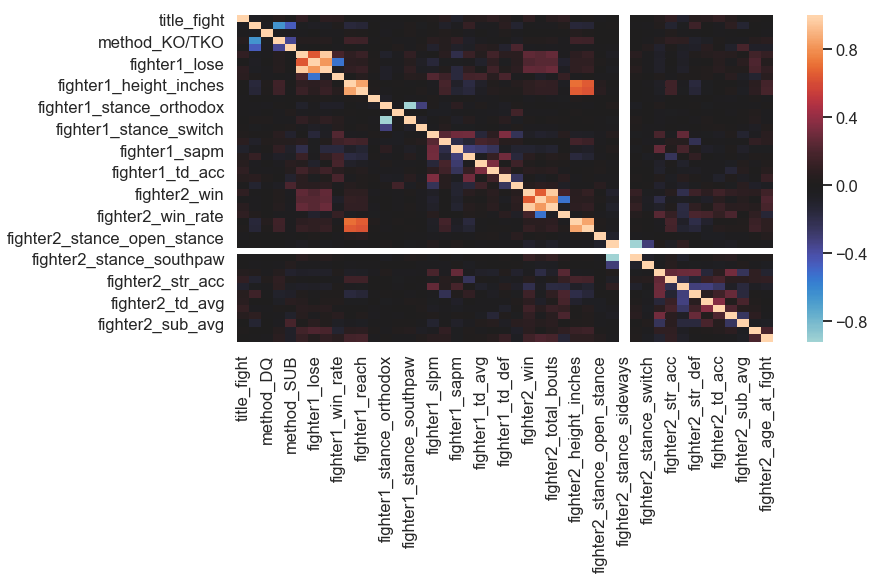

In [511]:
sns.heatmap(X_train.corr(), center=0)

# Modeling

### Try out different models, as no model is always best
For this project we are classifying.  There are many choices of classification algorithm, each with its own strengths and weaknesses.  There is no single classifier that always works best across all scenarios so we will compare a handful of different learning algorithms to select the best model for our particular problem.  

### Track each model's statistics
- We will keep track of each models statistics and performance in a dataframe

In [35]:
models_summary = pd.DataFrame()

In [36]:
models_summary

""


## Baseline Model - Zero Rule

In [48]:
# Calculate the number of times each fighter (1 and 2) won a bout
f1_wins = y_train.value_counts()[1]
f2_wins = y_train.value_counts()[0]
print('Fighter 1 wins: {}\nFighter 2 wins: {}'.format(f1_wins, f2_wins))

# Work out which outcome is in the majority
f1_wins_pct = y_train.value_counts(normalize=True)[1]
f2_wins_pct = y_train.value_counts(normalize=True)[0]
if f1_wins > f2_wins:
    print('\nOur Baseline Model will always predict Fighter 1 wins')
    majority_wins_pct = f1_wins_pct  
else:
    print('\nOur Baseline Model will always predict Fighter 2 wins')
    majority_wins_pct = f2_wins_pct
    
print('Null Rate: {}%'.format(round(majority_wins_pct*100, 2)))

# Save the Baseline Model to our models summary dataframe
models_summary['Baseline'] = [majority_wins_pct]

Fighter 1 wins: 1608
Fighter 2 wins: 1591

Our Baseline Model will always predict Fighter 1 wins
Null Rate: 50.27%


In [50]:
models_summary.rename_axis('Model', axis='columns', inplace=True)
models_summary.rename({0: 'Accuracy'}, inplace=True)

In [51]:
models_summary

Model,Baseline
Accuracy,0.502657


## K-Nearest Neighbors

### Why use KNN?
KNN is a instance-based learning type of nonparamteric model.  It memorizes the training dataset and adapts immediately as we collect new training data.  

The downside of KNN is that the computational complexity for classifying new samples grows linearly with the number of samples in the training dataset.  i.e. with every bout that occurs, and updates the model, the model becomes slower and slower to run.  Our dataset is relatively very small so we are able to use this model

We are using the default Minkowski distance, which requires our distances to be standardized.
We do not have to regularize our data but we should use feature selection and dimensionality reduction techniques to avoid the "curse of dimensionality" (which would cause our model to overfit)

### PCA to improve KNN

Why use PCA?
- PCA is a form of feature extraction, where we transform the data onto a new feature space whilst maintaining most of the relevant information.
- PCA does this by finding the directions of maximum variance in high-dimensional data, and then projects the data onto equal or fewer dimensions.  
- Patterns can be discovered in the data, based on the correlation between features.  
- 2 Main benefits of PCA:
    - Improves computational efficiency of our learning algorithm
    - Reduces the "_curse of dimensionality_", which can improve the predictive performance
- We need to standardize the features before we can perform PCA.  

The top 30 principal components explains 94.7% of the variance


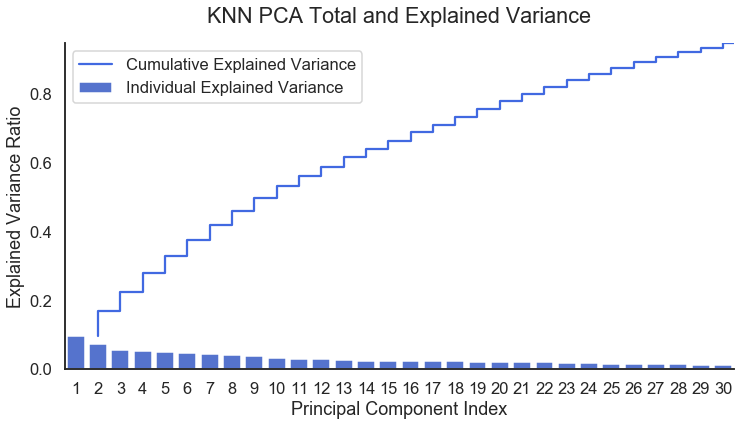

In [531]:
plot_explained_variance(X_train_std, features_to_show=30, title='KNN PCA Total and Explained Variance')

### Choosing the right number of neighbors (k)
- This is critical to avoid over and underfitting our model.

Highest Accuracy is 68.34%, when K is 25


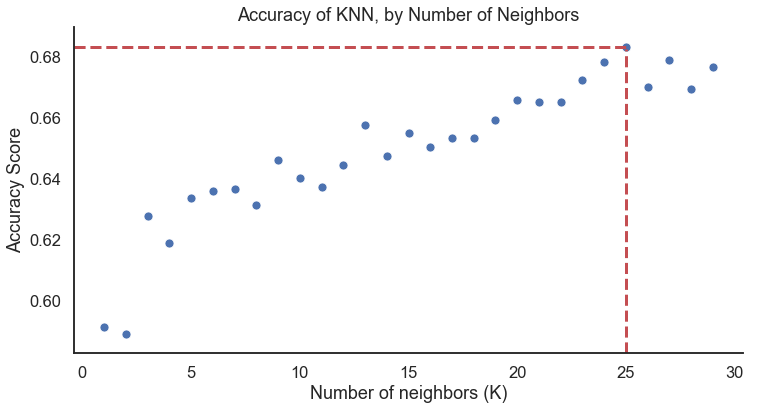

In [53]:
acc_by_k_value(X_train_std, y_train, X_test_std, y_test)

In [56]:
model_knn(X_train_std, n_neighbors=25)

Accuracy for K-Nearest Neighbors model (k = 25): 68.3%


The best K is the one that results in the highest test accuracy score.  The problem wiht using the chart above is that we are inadvertently using our test set as a training set.  We are forcing the model to fit the test set, which will reduce its ability to generalize to new bouts.  This is known as overfitting.

A better approach is to use k-fold cross validation, wherebye we hold out a subset of the training data and then train our model on this slightly reduced training data.  The held out subset is then replaced and a new, different subset is held out.  We train the model again on this new training data.  This process is repeated until all of the observations in the training data has been held out from some model's training data, then we take the average score of each of our models.

In [534]:
# # Perform PCA
# pca = PCA(n_components=45)
# pca.fit(X_train_std)
# X_pca = pca.transform(X_train_std)
# print("Original data shape:   ", X_train_std.shape)
# print("Transformed data shape:", X_pca.shape)

In [535]:
# print('KNN without PCA:')
# model_knn(X_train_std, n_neighbors=25)

# print('\nKNN with PCA:')
# model_knn(X_pca, n_neighbors=10, save_results=False)

- We can see that PCA has not improved our KNN Model

In [57]:
pipe_knn = Pipeline([('scl', StandardScaler()), 
                     ('clf', KNeighborsClassifier(n_jobs=-1))
                    ]
                   )

param_grid_knn = [
    {'clf__n_neighbors': list(range(3,25,2))}
]

gs_knn = GridSearchCV(estimator=pipe_knn,
            param_grid=param_grid_knn,
            scoring='accuracy',
            cv=5, 
            verbose=1, 
            return_train_score = True)

# Fit using grid search
gs_knn.fit(X_train, y_train)

# Best accuracy
print('Best Accuracy: {}%'.format(round(gs_knn.best_score_ * 100, 2)))

# Best params
print('\nBest params:\n', gs_knn.best_params_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Accuracy: 67.55%

Best params:
 {'clf__n_neighbors': 21}


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:   10.6s finished


In [60]:
model_knn_grid(X_train, y_train)

Best Accuracy: 67.55%

Best Params:
 {'clf__n_neighbors': 21}


In [116]:
temp_knn = KNeighborsClassifier(n_neighbors=21)
temp_knn.fit(X_train_std, y_train)
temp_y_pred = temp_knn.predict(X_test_std)
metrics.accuracy_score(y_test, temp_y_pred)

0.6652078774617067

In [64]:
model_knn(X_train_std, n_neighbors=21)

Accuracy for K-Nearest Neighbors model (k = 21): 66.5%


In [65]:
models_summary

Model,Baseline,KNN
Accuracy,0.502657,0.665208


## Random Forest

- Because this is an ensemble algorithm, the model is naturally resistant to noise and variance in the data (which helps reduce overfitting), and generally tends to perform quite well.
- As it is an ensemble alogorithm we have the computational cost of training each model

In [550]:
pipe_rf = Pipeline([('clf', RandomForestClassifier(random_state = 123,
                                                   n_jobs=-1
                                                  )
                    )
                   ]
                  )

# Set grid search params
param_grid_forest = [ 
  {'clf__n_estimators': [100, 110, 120],
   'clf__max_depth': [4, 5, 6],  
   'clf__min_samples_leaf':[0.05 ,0.1],  
   'clf__min_samples_split':[0.05 ,0.1]
  }
]

# Construct grid search
gs_rf = GridSearchCV(estimator=pipe_rf,
            param_grid=param_grid_forest,
            scoring='accuracy',
            cv=5, 
            verbose=1, 
            return_train_score = True)

# Fit using grid search
gs_rf.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: {:3f}'.format(gs_rf.best_score_))

# Best params
print('\nBest params:\n', gs_rf.best_params_)

# Save to models_summary dataframe
models_summary['Random Forest'] = gs_rf.best_score_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best accuracy: 0.711160

Best params:
 {'clf__max_depth': 4, 'clf__min_samples_leaf': 0.05, 'clf__min_samples_split': 0.05, 'clf__n_estimators': 110}


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  1.2min finished


In [105]:
# X_train_top_features = X_train.copy()
# X_train_top_features = rename_top_features(X_train_top_features)

# model_rf = RandomForestClassifier(n_estimators=110, max_depth= 4, min_samples_leaf=0.05,
#                                   min_samples_split=0.05, random_state=1, n_jobs=2)
# model_rf.fit(X_train_top_features, y_train)

# features = X_train_top_features.columns
# importances = model_rf.feature_importances_
# indices = np.argsort(importances)[::-1]

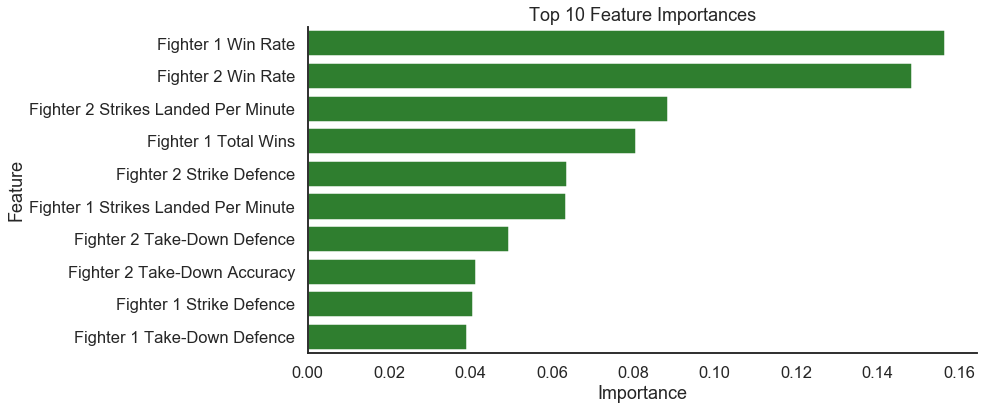

In [109]:
# plot_feature_importance(importances, indices, features_to_show=10)

In [825]:
model_rf_grid(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best accuracy: 0.711160

Best params:
 {'clf__max_depth': 4, 'clf__min_samples_leaf': 0.05, 'clf__min_samples_split': 0.05, 'clf__n_estimators': 110}


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  1.2min finished


- Note that we do not have to put our X_Train through standard scaler

In [135]:
max_depth = 4
min_samples_leaf = 0.05
min_samples_split = 0.05
n_estimators = 110

clf = RandomForestClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, 
                             min_samples_split=min_samples_split, n_estimators=n_estimators, random_state=123)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.6921954777534646

In [130]:
models_summary

Model,Baseline,KNN,Random Forest
Accuracy,0.502657,0.665208,0.692195


### Decision Trees - Gradient Boosting
- 2 popular ensemble methods:
    - Bagging (includes RF)
    - Boosting (includes AdaBoost and Gradient Boosting)

In [235]:
import pandas as pd
from sklearn.metrics import confusion_matrix
data = pd.read_csv('../data/processed/combined')
X = data.drop(['fighter1', 'fighter2', 'winner_is_fighter1'],axis=1)
y = data['winner_is_fighter1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


In [262]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score
import xgboost as xgb

D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

param = {
    'eta': 0.3, 
    'max_depth': 7,  
    'objective': 'multi:softprob',  
    'num_class': 2, 
    } 
steps = 100

In [263]:
model = xgb.train(param, D_train, steps)

Confusion matrix, without normalization



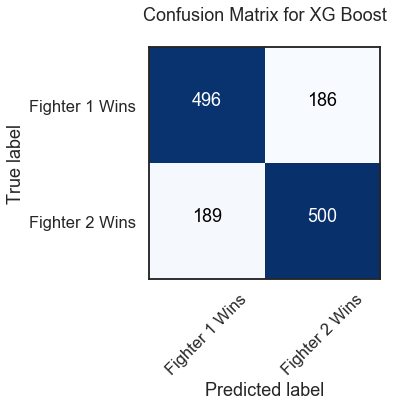

In [264]:
preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

# Plot Confusion Matrix
cm = confusion_matrix(y_test, best_preds)
plot_confusion_matrix(cm, ['Fighter 1 Wins','Fighter 2 Wins'], normalize=False, title='Confusion Matrix for XG Boost')

# Add XG Boost accuracy to our summary dataframe
models_summary['XG_Boost'] = metrics.accuracy_score(y_test, best_preds)

SK learn version of gradient boost

In [41]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

### XG Boost
- eXtreme Gradient Boosting (XG Boost) is a form of gradient boosting which often produces the best performances 
- XG Boost is able to parallelize the construction of decision trees across all our computer's CPU cores during the training phase
    - This can even be done across a cluster of computers 
- XG Boost can even handle NaN values

In [ ]:
# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'
# from xgboost import XGBClassifier
# import xgboost as xgb

In [231]:
# !conda install py-xgboost

WARNING conda.base.context:use_only_tar_bz2(632): Conda is constrained to only using the old .tar.bz2 file format because you have conda-build installed, and it is <3.18.3.  Update or remove conda-build to get smaller downloads and faster extractions.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.5
  latest version: 4.7.10

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [558]:
# clf = xgb.XGBClassifier()
# clf.fit(X_train_std, y_train)
# training_preds = clf.predict(X_train_std)
# val_preds = clf.predict(X_test_std)
# training_accuracy = accuracy_score(y_train, training_preds)
# val_accuracy = accuracy_score(y_test, val_preds)

# print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
# print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 80.28%
Validation accuracy: 71.99%


In [ ]:
# Construct pipeline
clf = xgb.XGBClassifier()

# Set grid search params
param_grid = {
    "learning_rate": [0.1, 0.01],
    'max_depth': [4,5,6],
    'min_child_weight': [10],
    'subsample': [0.7],
    'n_estimators': [100, 150, 200],
}

grid_clf = GridSearchCV(clf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_clf.fit(X_train_std, y_train)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("{:25s} {}".format(param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train_std)
val_preds = grid_clf.predict(X_test_std)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy:\t {:.4}%".format(training_accuracy * 100))
print("Validation Accuracy:\t {:.4}%".format(val_accuracy * 100))


In [3]:
model_xgb_grid(X_train_=X_train, y_train_=y_train, X_test_=X_test, y_test_=y_test)

NameError: name 'X_train' is not defined

In [832]:
clf = XGBClassifier(learning_rate=0.1, max_depth=5, min_child_weight=10,n_estimators=150,subsample=0.7)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred)



# Save to models_summary dataframe
models_summary['XG Boost'] = xgb_accuracy

# # Update models_summary table
# if save_to_models_summary:
#     models_summary['XG Boost'] = accuracy_score(y_test_, y_pred)

ValueError: feature_names mismatch: ['title_fight', 'method_DEC', 'method_DQ', 'method_KO/TKO', 'method_SUB', 'Fighter 1 Total Wins', 'fighter1_lose', 'fighter1_total_bouts', 'Fighter 1 Win Rate', 'fighter1_height_inches', 'fighter1_reach', 'fighter1_stance_open_stance', 'fighter1_stance_orthodox', 'fighter1_stance_sideways', 'fighter1_stance_southpaw', 'fighter1_stance_switch', 'Fighter 1 Strikes Landed Per Minute', 'fighter1_str_acc', 'fighter1_sapm', 'Fighter 1 Strike Defence', 'fighter1_td_avg', 'fighter1_td_acc', 'Fighter 1 Take-Down Defence', 'fighter1_sub_avg', 'Fighter 2 Total Wins', 'fighter2_lose', 'fighter2_total_bouts', 'Fighter 2 Win Rate', 'fighter2_height_inches', 'fighter2_reach', 'fighter2_stance_open_stance', 'fighter2_stance_orthodox', 'fighter2_stance_sideways', 'fighter2_stance_southpaw', 'fighter2_stance_switch', 'Fighter 2 Strikes Landed Per Minute', 'fighter2_str_acc', 'fighter2_sapm', 'Fighter 2 Strike Defence', 'fighter2_td_avg', 'fighter2_td_acc', 'Fighter 2 Take-Down Defence', 'fighter2_sub_avg', 'fighter1_age_at_fight', 'fighter2_age_at_fight'] ['title_fight', 'method_DEC', 'method_DQ', 'method_KO/TKO', 'method_SUB', 'fighter1_win', 'fighter1_lose', 'fighter1_total_bouts', 'fighter1_win_rate', 'fighter1_height_inches', 'fighter1_reach', 'fighter1_stance_open_stance', 'fighter1_stance_orthodox', 'fighter1_stance_sideways', 'fighter1_stance_southpaw', 'fighter1_stance_switch', 'fighter1_slpm', 'fighter1_str_acc', 'fighter1_sapm', 'fighter1_str_def', 'fighter1_td_avg', 'fighter1_td_acc', 'fighter1_td_def', 'fighter1_sub_avg', 'fighter2_win', 'fighter2_lose', 'fighter2_total_bouts', 'fighter2_win_rate', 'fighter2_height_inches', 'fighter2_reach', 'fighter2_stance_open_stance', 'fighter2_stance_orthodox', 'fighter2_stance_sideways', 'fighter2_stance_southpaw', 'fighter2_stance_switch', 'fighter2_slpm', 'fighter2_str_acc', 'fighter2_sapm', 'fighter2_str_def', 'fighter2_td_avg', 'fighter2_td_acc', 'fighter2_td_def', 'fighter2_sub_avg', 'fighter1_age_at_fight', 'fighter2_age_at_fight']
expected Fighter 2 Total Wins, Fighter 1 Strike Defence, Fighter 1 Take-Down Defence, Fighter 1 Strikes Landed Per Minute, Fighter 2 Strike Defence, Fighter 1 Total Wins, Fighter 2 Strikes Landed Per Minute, Fighter 1 Win Rate, Fighter 2 Take-Down Defence, Fighter 2 Win Rate in input data
training data did not have the following fields: fighter2_slpm, fighter1_slpm, fighter1_str_def, fighter2_str_def, fighter2_win, fighter1_win_rate, fighter1_win, fighter2_td_def, fighter1_td_def, fighter2_win_rate

In [502]:
# # Construct pipeline
# clf = XGBClassifier(random_state=123)
# pipe_xg = Pipeline([('clf', clf)])

# # Set grid search params
# param_grid_xgboost = {
#     "learning_rate": [0.1, 0.01],
#     'max_depth': [4,5,6],
#     'min_child_weight': [10],
#     'subsample': [0.7],
#     'n_estimators': [50, 100, 150, 200],
# }

# # Construct grid search
# gs_xg = GridSearchCV(estimator=pipe_xg,
#             param_grid=param_grid_xgboost,
#             scoring='accuracy',
#             cv=5,
#             verbose=1,
#             return_train_score = True,
#             n_jobs=-1)

# # Fit using grid search
# gs_xg.fit(X_train, y_train)

# # Best accuracy
# print('Best Accuracy: {}%'.format(round(gs_xg.best_score_ * 100, 2)))

# # Best params
# print('\nBest params:\n', gs_xg.best_params_)

# # Save to models_summary dataframe
# models_summary['XG Boost'] = gs_xg.best_score_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


ValueError: Invalid parameter learning_rate for estimator Pipeline(memory=None,
     steps=[('clf', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=nan, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=123, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1))]). Check the list of available parameters with `estimator.get_params().keys()`.

In [560]:
models_summary

Model,Baseline,KNN,Random Forest,XG Boost
Accuracy,0.502657,0.665208,0.692195,0.738877


### Ada Boost

In [561]:
# Construct pipeline
pipe_ab = Pipeline([('scl', StandardScaler()),
            ('clf', AdaBoostClassifier(random_state = 123))])

# Set grid search params
param_grid_adaboost = {
    'clf__n_estimators': [30, 50, 70, 90],
    'clf__learning_rate': [1.0, 0.5, 0.1, 0.01]
}

# Construct grid search
gs_ab = GridSearchCV(estimator=pipe_ab,
            param_grid=param_grid_adaboost,
            scoring='accuracy',
            cv=5,
            verbose=1,
            return_train_score = True,
            n_jobs=-1)

# Fit using grid search
gs_ab.fit(X_train, y_train)

# Best accuracy
print('Best Accuracy: {}%'.format(round(gs_ab.best_score_ * 100, 2)))

# Best params
print('\nBest params:\n', gs_ab.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    4.0s finished


Best Accuracy: 71.9%

Best params:
 {'clf__learning_rate': 0.5, 'clf__n_estimators': 70}


In [830]:
model_ada_boost_grid(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    5.2s finished


Best Accuracy: 71.9%

Best params:
 {'clf__learning_rate': 0.5, 'clf__n_estimators': 70}


In [562]:
clf = AdaBoostClassifier(learning_rate=0.5, n_estimators=70)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.712618526622903

In [563]:
model_ada_boost(X_train, y_train, X_test, y_test, learning_rate=0.5, n_estimators=70, update_models_summary=True)

0.712618526622903

In [828]:
models_summary

,Accuracy,Baseline,Logistic Regression,Random Forest
Model,,,,
Baseline,0.5027,0.502657,0.697301,0.692925
KNN,0.6652,0.502657,0.697301,0.692925
Random Forest,0.6922,0.502657,0.697301,0.692925
Neural Network (tanh),0.6951,0.502657,0.697301,0.692925
Logistic Regression,0.7058,0.502657,0.697301,0.692925
Ada Boost,0.7126,0.502657,0.697301,0.692925
Neural Network (relu),0.7177,0.502657,0.697301,0.692925
XG Boost,0.7389,0.502657,0.697301,0.692925


## Logistic Regression

In [790]:
1e-3

0.001

In [789]:
np.logspace(-3,3,7)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [815]:
# Construct pipeline
pipe_lr = Pipeline([('scl', StandardScaler()),
            ('clf', LogisticRegression(fit_intercept=False, random_state=123, solver='lbfgs'))])

# Set grid search params
param_grid_logreg = {'clf__C':np.logspace(-3,3,7)
}

# Construct grid search
gs_lr = GridSearchCV(estimator=pipe_lr,
            param_grid=param_grid_logreg,
            scoring='accuracy',
            cv=5,
            verbose=1,
            return_train_score = True,
            n_jobs=-1)

# Fit using grid search
gs_lr.fit(X_train_std, y_train)

# Best accuracy
print('Best Accuracy: {}%'.format(round(gs_lr.best_score_ * 100, 2)))

# Best params
print('\nBest params:\n', gs_lr.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best Accuracy: 70.93%

Best params:
 {'clf__C': 0.1}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.7s finished


In [820]:
model_logreg_grid(X_train_std, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best Accuracy: 70.93%

Best params:
 {'clf__C': 0.1}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    0.3s finished


In [811]:
logreg = LogisticRegression(C = 0.1, solver='lbfgs', random_state=123)
model_log = logreg.fit(X_train_std, y_train)

    # Predict
y_pred_class = logreg.predict(X_test_std)
lr_accuracy = metrics.accuracy_score(y_test, y_pred_class)

print('Accuracy for Logistic Regression model: {}%'.format(round(lr_accuracy*100,1)))

# Save to models_summary dataframe
models_summary['Logistic Regression'] = lr_accuracy

Accuracy for Logistic Regression model: 69.7%


In [814]:
model_logreg(C_=0.1, X_train_=X_train_std, y_train_=y_train, X_test_=X_test_std, y_test_=y_test)

Accuracy for Logistic Regression model: 69.7%


In [ ]:
#     # Classifier correctness on training data
# residuals = np.abs(y_train - y_hat_train)
# print(pd.Series(residuals).value_counts())
# print(pd.Series(residuals).value_counts(normalize=True))
# correct = pd.Series(residuals).value_counts(normalize=True)[0]
# print('\nOur model is {}% accurate for our training data'.format(round(correct*100,2)))
#         # Classifier correctness on testing data
# residuals = np.abs(y_test - y_hat_test)
# print(pd.Series(residuals).value_counts(),'\n')
# print(pd.Series(residuals).value_counts(normalize=True))
# correct = pd.Series(residuals).value_counts(normalize=True)[0]
# print('\nOur model is {}% accurate for our test data'.format(round(correct*100,2)))

In [241]:
# import statsmodels.api as sm

# logit_model = sm.Logit(y,X)
# result = logit_model.fit()
#     # See results of 2nd model
# model1_summary = result.summary()
# model1_summary
#     # Drop rubbish pvalues
# alpha = 0.05
# variables_to_keep = []
# for X_variable, pvalue in list(zip(X,result.pvalues)):
#     if pvalue <= alpha:
#         variables_to_keep.append(X_variable)
# variables_to_keep  # leaves behind the variables that have p value below the alpha
# X = X.drop(columns=variables_to_keep)  # take out the variables
#     # Fit the 2nd model
# logit_model = sm.Logit(y, X)
# result = logit_model.fit()
#     # see results of 2nd model
# model2_summary = result.summary()
# model2_summary

         Current function value: 0.553735
         Iterations: 35


LinAlgError: Singular matrix

In [566]:
models_summary

Model,Baseline,KNN,Random Forest,XG Boost,Ada Boost,Logistic Regression
Accuracy,0.502657,0.665208,0.692195,0.738877,0.712619,0.705846


## Implementing Neural Network with tanh

In [650]:
model_tanh = Sequential()

# Input Layer
model_tanh.add(Dense(64, input_dim=X_train_std.shape[1], activation = 'tanh'))

# Hidden Layer 1
model_tanh.add(Dense(32, input_dim = 64, activation = 'tanh'))

# Hidden Layer 2
model_tanh.add(Dense(units = 1, input_dim = 32, activation = 'sigmoid'))

# Output Layer
sgd_optimizer = SGD(lr=0.01, decay=1e-7, momentum=0.9) #learn rate, weight decay constant, momentum learning

There is a tradeoff when we are finding an appropriate learning rate.  
- Too large and the alorithm may overshoot the global cost minimum.  
- Too small and the algorithm requires far more epochs until convergence, which results in unecessary computation

Why we use a sigmoid function
- Our goal is to predict the probability that a certain sample belongs to a particular class, given its features.  In other words the probability that a certain matchup of two fighters will result in a win for fighter 1.  
- For this reason, we will use the logistic sigmoid function (abbreviated to sigmoid function) as our activation function.   The sigmoid function takes in any real number value and outputs a value between 0 and 1, which will represent the probability that we are after.  

In [651]:
model_tanh.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [652]:
# model_tanh.fit(X_train_std, y_train, epochs=100, batch_size=256)


## Fitting the Model

In [653]:
history_tanh = model_tanh.fit(X_train_std, y_train, batch_size=256, epochs=300, verbose=1, validation_split=0.1)  
# verbose lets us follow optimization of cost function, 
# validation split helps monitor if model is overfitting in training
# We use batches so that we dont have to wait until everything is processed to start backpropagating.  

Train on 2879 samples, validate on 320 samples
Epoch 1/300
2879/2879 [==============================] - 0s 71us/step - loss: 0.7490 - acc: 0.4932 - val_loss: 0.7636 - val_acc: 0.4781
Epoch 2/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.7302 - acc: 0.5148 - val_loss: 0.7445 - val_acc: 0.4875
Epoch 3/300
2879/2879 [==============================] - 0s 5us/step - loss: 0.7146 - acc: 0.5287 - val_loss: 0.7278 - val_acc: 0.5031
Epoch 4/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.7008 - acc: 0.5419 - val_loss: 0.7138 - val_acc: 0.5250
Epoch 5/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.6890 - acc: 0.5585 - val_loss: 0.7011 - val_acc: 0.5406
Epoch 6/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.6782 - acc: 0.5707 - val_loss: 0.6908 - val_acc: 0.5531
Epoch 7/300
2879/2879 [==============================] - 0s 5us/step - loss: 0.6689 - acc: 0.5877 - val_loss: 0.6817 - val_acc: 0.5687
Epoch 8

Epoch 61/300
2879/2879 [==============================] - 0s 5us/step - loss: 0.5589 - acc: 0.7127 - val_loss: 0.5876 - val_acc: 0.6937
Epoch 62/300
2879/2879 [==============================] - 0s 5us/step - loss: 0.5586 - acc: 0.7121 - val_loss: 0.5875 - val_acc: 0.6937
Epoch 63/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5582 - acc: 0.7124 - val_loss: 0.5874 - val_acc: 0.6937
Epoch 64/300
2879/2879 [==============================] - 0s 7us/step - loss: 0.5579 - acc: 0.7134 - val_loss: 0.5870 - val_acc: 0.6937
Epoch 65/300
2879/2879 [==============================] - 0s 7us/step - loss: 0.5575 - acc: 0.7138 - val_loss: 0.5868 - val_acc: 0.6906
Epoch 66/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5572 - acc: 0.7134 - val_loss: 0.5869 - val_acc: 0.6969
Epoch 67/300
2879/2879 [==============================] - 0s 7us/step - loss: 0.5570 - acc: 0.7127 - val_loss: 0.5869 - val_acc: 0.6937
Epoch 68/300
2879/2879 [========================

2879/2879 [==============================] - 0s 7us/step - loss: 0.5467 - acc: 0.7183 - val_loss: 0.5828 - val_acc: 0.6969
Epoch 122/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5465 - acc: 0.7190 - val_loss: 0.5828 - val_acc: 0.6969
Epoch 123/300
2879/2879 [==============================] - 0s 5us/step - loss: 0.5463 - acc: 0.7173 - val_loss: 0.5827 - val_acc: 0.6969
Epoch 124/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5462 - acc: 0.7193 - val_loss: 0.5827 - val_acc: 0.6969
Epoch 125/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5460 - acc: 0.7211 - val_loss: 0.5828 - val_acc: 0.6937
Epoch 126/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5459 - acc: 0.7190 - val_loss: 0.5830 - val_acc: 0.6969
Epoch 127/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5458 - acc: 0.7197 - val_loss: 0.5829 - val_acc: 0.6969
Epoch 128/300
2879/2879 [==============================

Epoch 181/300
2879/2879 [==============================] - 0s 7us/step - loss: 0.5389 - acc: 0.7263 - val_loss: 0.5818 - val_acc: 0.6937
Epoch 182/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5388 - acc: 0.7266 - val_loss: 0.5819 - val_acc: 0.6937
Epoch 183/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5387 - acc: 0.7270 - val_loss: 0.5820 - val_acc: 0.6937
Epoch 184/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5386 - acc: 0.7270 - val_loss: 0.5819 - val_acc: 0.6937
Epoch 185/300
2879/2879 [==============================] - 0s 7us/step - loss: 0.5385 - acc: 0.7270 - val_loss: 0.5819 - val_acc: 0.6937
Epoch 186/300
2879/2879 [==============================] - 0s 7us/step - loss: 0.5384 - acc: 0.7273 - val_loss: 0.5816 - val_acc: 0.6937
Epoch 187/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5383 - acc: 0.7284 - val_loss: 0.5819 - val_acc: 0.6969
Epoch 188/300
2879/2879 [================

Epoch 241/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5320 - acc: 0.7319 - val_loss: 0.5809 - val_acc: 0.7000
Epoch 242/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5319 - acc: 0.7319 - val_loss: 0.5808 - val_acc: 0.6969
Epoch 243/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5318 - acc: 0.7329 - val_loss: 0.5807 - val_acc: 0.7000
Epoch 244/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5316 - acc: 0.7325 - val_loss: 0.5803 - val_acc: 0.7000
Epoch 245/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5315 - acc: 0.7336 - val_loss: 0.5803 - val_acc: 0.7000
Epoch 246/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5314 - acc: 0.7329 - val_loss: 0.5804 - val_acc: 0.6969
Epoch 247/300
2879/2879 [==============================] - 0s 7us/step - loss: 0.5313 - acc: 0.7332 - val_loss: 0.5803 - val_acc: 0.6969
Epoch 248/300
2879/2879 [================

We have reduced the loss by 29.9% by training the model through 300 epochs


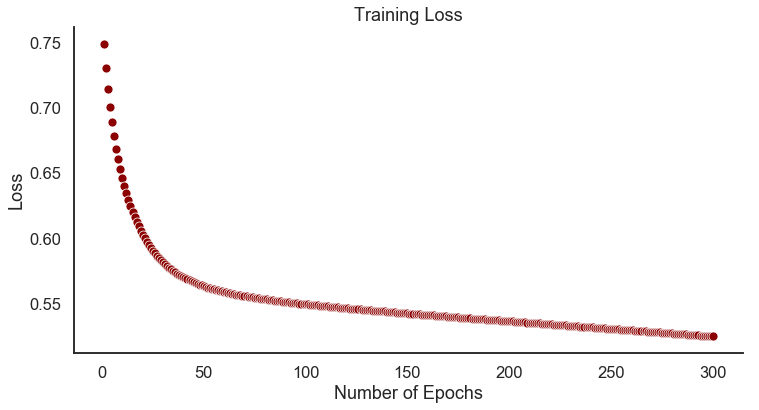

In [654]:
loss = history_tanh.history['loss']
plot_training_loss(loss)

We have increased the accuracy by 50.35% by training the model through 300 epochs


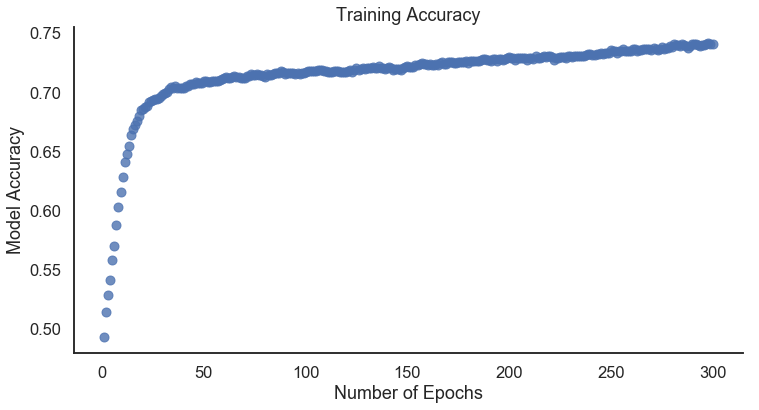

In [655]:
acc = history_tanh.history['acc']
plot_training_accuracy(acc, history_tanh)

We have increased the accuracy by 50.35% by training the model through 300 epochs


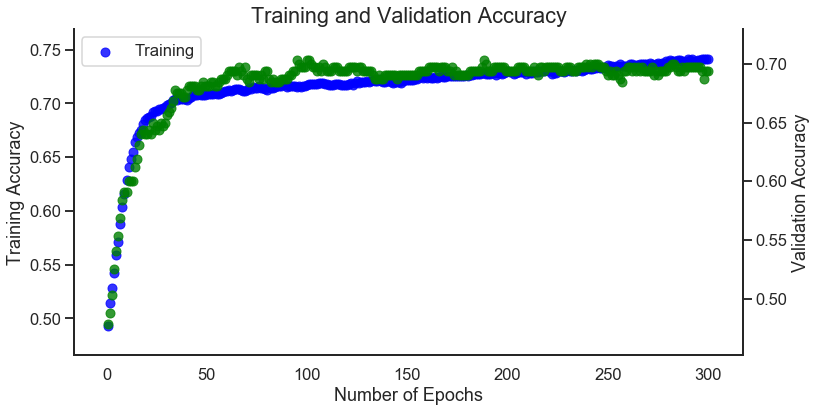

In [662]:
val_acc = history_tanh.history['val_acc']
plot_training_and_validation_accuracy(acc, val_acc, history_tanh)

## Confusion Matrix for Neural Network

In [158]:
cm = confusion_matrix(y_test,y_test_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

Normalized confusion matrix



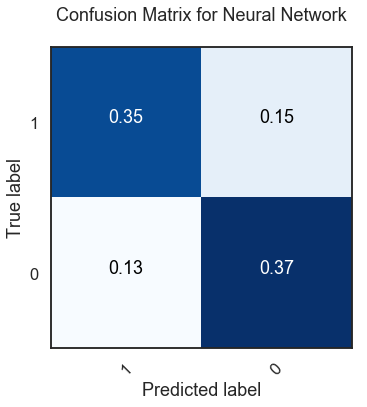

In [159]:
plot_confusion_matrix(cm=cm, classes=[1,0], normalize=True, title='Confusion Matrix for Neural Network');

## Model Accuracy

### Predicting Class Labels & Accuracy

In [574]:
y_train_pred = model_tanh.predict_classes(X_train_std, verbose=0)
y_train_pred = [item for sublist in y_train_pred for item in sublist]
print('First 3 bout predictions: ', y_train_pred[:3])

# Training Accuracy
correct_preds = np.sum(y_train == y_train_pred, axis=0)
train_acc = correct_preds / y_train.shape[0]
print('Training Accuracy: {}%'.format(round(train_acc * 100, 2)))

First 3 bout predictions:  [1, 1, 0]
Training Accuracy: 73.84%


In [599]:
# Testing Accuracy
y_test_pred = model_tanh.predict_classes(X_test_std, verbose=0)
y_test_pred = [item for sublist in y_test_pred for item in sublist]
correct_preds = np.sum(y_test == y_test_pred, axis=0)
test_acc = correct_preds / y_test.shape[0]
print('Test Accuracy: {}%'.format(round(test_acc * 100), 4))

Test Accuracy: 70.0%


In [589]:
# Learn.co
tanh_train_score = model_tanh.evaluate(X_train_std, y_train)
tanh_test_score = model_tanh.evaluate(X_test_std, y_test)

print('Training Data Accuracy: {}%'.format(round(tanh_train_score[1]*100, 2)))
print('Test Data Accuracy: \t{}%'.format(round(tanh_test_score[1]*100, 2)))

# Add Score to Models Summary DataFrame
models_summary['Neural Network (tanh)'] = tanh_test_score[1]

1371/1371 [==============================] - 0s 13us/step
Training Data Accuracy: 73.84%
Test Data Accuracy: 	69.51%


In [590]:
models_summary

Model,Baseline,KNN,Random Forest,XG Boost,Ada Boost,Logistic Regression,Neural Network (tanh)
Accuracy,0.502657,0.665208,0.692195,0.738877,0.712619,0.705846,0.695113


# Relu version

In [591]:
model_relu = Sequential()
activation = 'relu'

# Input Layer
model_relu.add(Dense(64, input_dim=X_train_std.shape[1], activation = activation))

# Hidden Layer 1
model_relu.add(Dense(32, input_dim = 64, activation = activation))

# Hidden Layer 2
model_relu.add(Dense(units = 1, input_dim = 32, activation = 'sigmoid'))

# Output Layer
sgd_optimizer = SGD(lr=0.01, decay=1e-7, momentum=0.9) #learn rate, weight decay constant, momentum learning

In [592]:
model_relu.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [593]:
# Fit model
history_relu = model_relu.fit(X_train_std, y_train, batch_size=256, epochs=300, verbose=1, validation_split=0.1)  

Train on 2879 samples, validate on 320 samples
Epoch 1/300
2879/2879 [==============================] - 0s 47us/step - loss: 0.7518 - acc: 0.5127 - val_loss: 0.7357 - val_acc: 0.5031
Epoch 2/300
2879/2879 [==============================] - 0s 7us/step - loss: 0.7269 - acc: 0.5214 - val_loss: 0.7123 - val_acc: 0.5125
Epoch 3/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.7092 - acc: 0.5419 - val_loss: 0.6964 - val_acc: 0.5344
Epoch 4/300
2879/2879 [==============================] - 0s 5us/step - loss: 0.6969 - acc: 0.5502 - val_loss: 0.6855 - val_acc: 0.5437
Epoch 5/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.6882 - acc: 0.5648 - val_loss: 0.6766 - val_acc: 0.5594
Epoch 6/300
2879/2879 [==============================] - 0s 5us/step - loss: 0.6810 - acc: 0.5776 - val_loss: 0.6699 - val_acc: 0.5813
Epoch 7/300
2879/2879 [==============================] - 0s 5us/step - loss: 0.6754 - acc: 0.5842 - val_loss: 0.6653 - val_acc: 0.6000
Epoch 8

Epoch 61/300
2879/2879 [==============================] - 0s 5us/step - loss: 0.5746 - acc: 0.7041 - val_loss: 0.5955 - val_acc: 0.6375
Epoch 62/300
2879/2879 [==============================] - 0s 7us/step - loss: 0.5735 - acc: 0.7072 - val_loss: 0.5951 - val_acc: 0.6375
Epoch 63/300
2879/2879 [==============================] - 0s 7us/step - loss: 0.5724 - acc: 0.7068 - val_loss: 0.5945 - val_acc: 0.6375
Epoch 64/300
2879/2879 [==============================] - 0s 7us/step - loss: 0.5713 - acc: 0.7068 - val_loss: 0.5939 - val_acc: 0.6438
Epoch 65/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5704 - acc: 0.7079 - val_loss: 0.5935 - val_acc: 0.6438
Epoch 66/300
2879/2879 [==============================] - 0s 5us/step - loss: 0.5694 - acc: 0.7082 - val_loss: 0.5928 - val_acc: 0.6469
Epoch 67/300
2879/2879 [==============================] - 0s 5us/step - loss: 0.5685 - acc: 0.7117 - val_loss: 0.5922 - val_acc: 0.6531
Epoch 68/300
2879/2879 [========================

2879/2879 [==============================] - 0s 6us/step - loss: 0.5339 - acc: 0.7301 - val_loss: 0.5757 - val_acc: 0.6813
Epoch 122/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5334 - acc: 0.7312 - val_loss: 0.5755 - val_acc: 0.6750
Epoch 123/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5328 - acc: 0.7319 - val_loss: 0.5752 - val_acc: 0.6750
Epoch 124/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5324 - acc: 0.7329 - val_loss: 0.5748 - val_acc: 0.6813
Epoch 125/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5319 - acc: 0.7325 - val_loss: 0.5745 - val_acc: 0.6813
Epoch 126/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5315 - acc: 0.7346 - val_loss: 0.5746 - val_acc: 0.6781
Epoch 127/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5310 - acc: 0.7350 - val_loss: 0.5745 - val_acc: 0.6781
Epoch 128/300
2879/2879 [==============================

Epoch 181/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5086 - acc: 0.7475 - val_loss: 0.5697 - val_acc: 0.6844
Epoch 182/300
2879/2879 [==============================] - 0s 5us/step - loss: 0.5082 - acc: 0.7492 - val_loss: 0.5697 - val_acc: 0.6813
Epoch 183/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5078 - acc: 0.7496 - val_loss: 0.5696 - val_acc: 0.6813
Epoch 184/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5074 - acc: 0.7503 - val_loss: 0.5693 - val_acc: 0.6813
Epoch 185/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5070 - acc: 0.7499 - val_loss: 0.5689 - val_acc: 0.6844
Epoch 186/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5067 - acc: 0.7492 - val_loss: 0.5689 - val_acc: 0.6813
Epoch 187/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.5063 - acc: 0.7503 - val_loss: 0.5693 - val_acc: 0.6813
Epoch 188/300
2879/2879 [================

Epoch 241/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.4863 - acc: 0.7655 - val_loss: 0.5672 - val_acc: 0.6969
Epoch 242/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.4860 - acc: 0.7645 - val_loss: 0.5676 - val_acc: 0.6937
Epoch 243/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.4856 - acc: 0.7635 - val_loss: 0.5690 - val_acc: 0.6906
Epoch 244/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.4852 - acc: 0.7652 - val_loss: 0.5687 - val_acc: 0.6906
Epoch 245/300
2879/2879 [==============================] - 0s 6us/step - loss: 0.4849 - acc: 0.7652 - val_loss: 0.5682 - val_acc: 0.6906
Epoch 246/300
2879/2879 [==============================] - 0s 7us/step - loss: 0.4845 - acc: 0.7645 - val_loss: 0.5678 - val_acc: 0.6906
Epoch 247/300
2879/2879 [==============================] - 0s 8us/step - loss: 0.4842 - acc: 0.7645 - val_loss: 0.5685 - val_acc: 0.6906
Epoch 248/300
2879/2879 [================

We have reduced the loss by 38.06% by training the model through 300 epochs


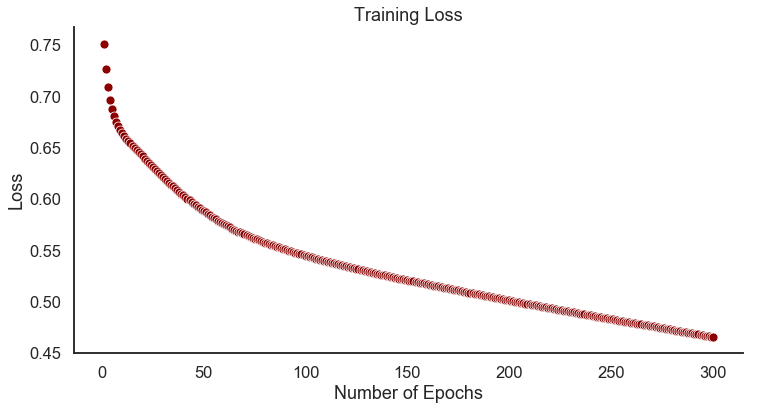

In [594]:
loss = history_relu.history['loss']
plot_training_loss(loss)

We have increased the accuracy by 52.37% by training the model through 300 epochs


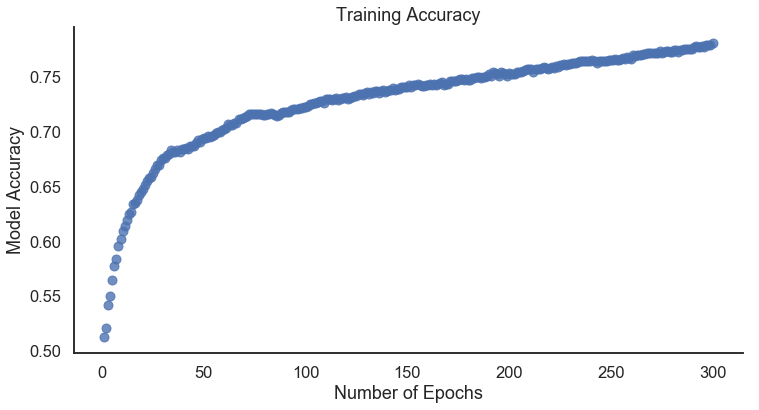

In [595]:

plot_training_accuracy(acc, history_relu)

We have increased the accuracy by 52.37% by training the model through 300 epochs


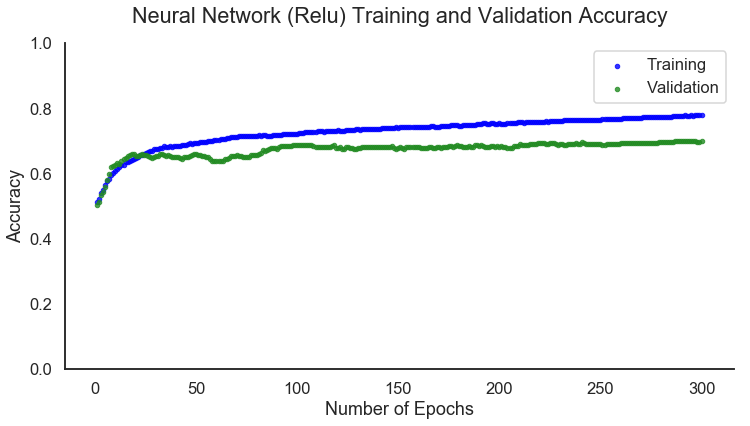

In [778]:
acc = history_relu.history['acc']
val_acc = history_relu.history['val_acc']
plot_training_and_validation_accuracy(acc, val_acc, history_relu,
                                      title='Neural Network (Relu) Training and Validation Accuracy')


/anaconda3/envs/ml-ufc-env/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


We have increased the accuracy by 50.35% by training the model through 300 epochs


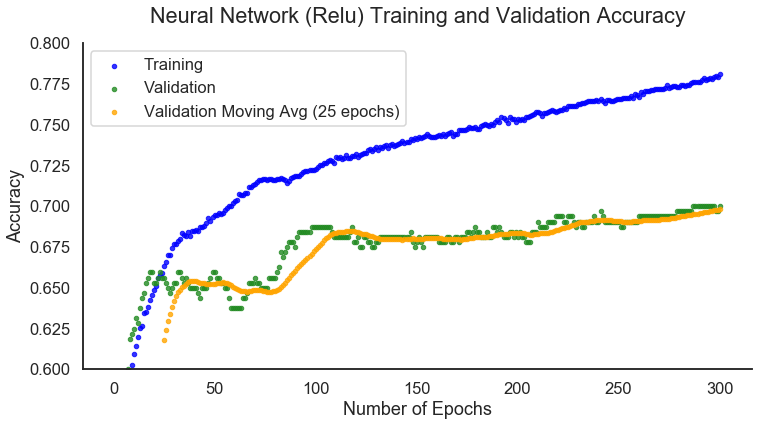

In [777]:
plot_training_and_validation_accuracy(acc, val_acc, history_relu,
                                      title='Neural Network (Relu) Training and Validation Accuracy',
                                      y_lim=(0.6,0.8), show_mov_avg=True)


In [596]:
y_train_pred = model_relu.predict_classes(X_train_std, verbose=0)
y_train_pred = [item for sublist in y_train_pred for item in sublist]
print('First 3 bout predictions: ', y_train_pred[:3])

# Training Accuracy
correct_preds = np.sum(y_train == y_train_pred, axis=0)
train_acc = correct_preds / y_train.shape[0]
print('Training Accuracy: {}%'.format(round(train_acc * 100, 2)))

First 3 bout predictions:  [1, 1, 0]
Training Accuracy: 77.18%


In [602]:
# Testing Accuracy
y_test_pred = model_relu.predict_classes(X_test_std, verbose=0)
y_test_pred = [item for sublist in y_test_pred for item in sublist]
correct_preds = np.sum(y_test == y_test_pred, axis=0)
test_acc = correct_preds / y_test.shape[0]
print('Test Accuracy: {}%'.format(round(test_acc * 100), 2))

# Add Score to Models Summary DataFrame
models_summary['Neural Network (relu)'] = relu_test_score[1] 

Test Accuracy: 72.0%


In [600]:
relu_test_score = model_relu.evaluate(X_test_std, y_test)

1371/1371 [==============================] - 0s 17us/step


In [601]:
relu_test_score

[0.5618149627307137, 0.7177242892315403]

In [603]:
models_summary

Model,Baseline,KNN,Random Forest,XG Boost,Ada Boost,Logistic Regression,Neural Network (tanh),Neural Network (relu)
Accuracy,0.502657,0.665208,0.692195,0.738877,0.712619,0.705846,0.695113,0.717724


# Evaluation of Models

In [604]:
# Round the Accuracy score to 4 decimal places
models_summary.loc['Accuracy'] = list(map(lambda x: round(x,4), models_summary.loc['Accuracy']))

In [606]:
models_summary.T

,Accuracy
Model,
Baseline,0.5027
KNN,0.6652
Random Forest,0.6922
XG Boost,0.7389
Ada Boost,0.7126
Logistic Regression,0.7058
Neural Network (tanh),0.6951
Neural Network (relu),0.7177


Although there are many metrics to evaluate our models against one another, the [Occam's Razor principle](https://www.britannica.com/topic/Occams-razor) can often be applied (That is, that the simpler explanation is to be preferred).  In the case of comparing our models, we are most interested in how many fights we correctly predict, i.e. the accuracy.  There is virtually no class imbalance and the cost associated with a false positive and a false negative are identical.

## BarChart to compare models

In [637]:
models_summary = models_summary.T
models_summary

,Accuracy
Model,
Baseline,0.5027
KNN,0.6652
Random Forest,0.6922
XG Boost,0.7389
Ada Boost,0.7126
Logistic Regression,0.7058
Neural Network (tanh),0.6951
Neural Network (relu),0.7177


In [641]:
# Sort models_summary into order
models_summary.sort_values('Accuracy', inplace=True)

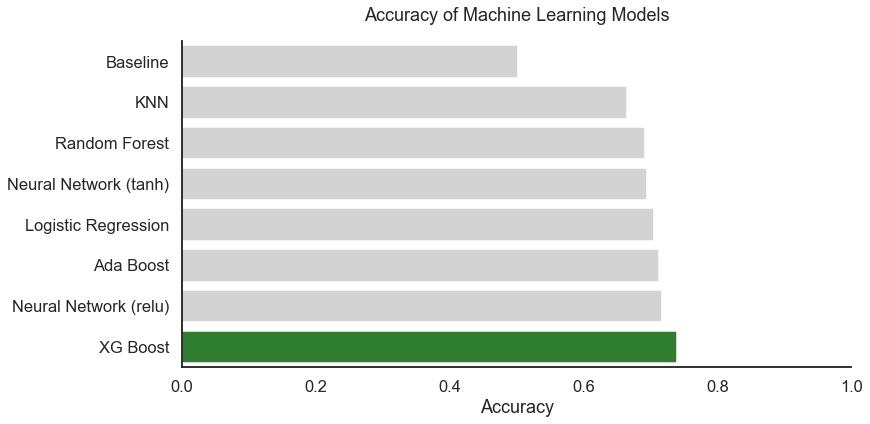

In [642]:
values = models_summary['Accuracy']
clrs = ['lightgrey' if (x < max(values)) else 'forestgreen' for x in values ]
ax = sns.barplot(x='Accuracy', y=list(models_summary.index), data=models_summary, palette=clrs)

ax.set_title('Accuracy of Machine Learning Models', pad=20)
ax.set_xlim(left=0, right=1)
sns.despine()

In [ ]:
cm = confusion_matrix()
plot_confusion_matrix()

# Predict Outcome of Future Bouts

In [644]:
X.head()

,title_fight,method_DEC,method_DQ,method_KO/TKO,method_SUB,fighter1_win,fighter1_lose,fighter1_total_bouts,fighter1_win_rate,fighter1_height_inches,...,fighter2_slpm,fighter2_str_acc,fighter2_sapm,fighter2_str_def,fighter2_td_avg,fighter2_td_acc,fighter2_td_def,fighter2_sub_avg,fighter1_age_at_fight,fighter2_age_at_fight
0,0,0,0,1,0,21,8,29,0.72,75.0,...,4.27,39,4.02,64,0.54,44,60,0.0,31.0,32.0
1,0,0,0,1,0,19,7,26,0.73,68.0,...,3.36,37,2.83,53,2.68,35,57,1.3,36.0,34.0
2,0,0,0,1,0,8,2,10,0.80,73.0,...,5.37,70,3.36,25,0.89,100,100,2.6,28.0,26.0
3,0,1,0,0,0,14,7,21,0.67,73.0,...,3.49,58,1.67,52,0.81,14,50,1.6,33.0,30.0
4,0,0,0,0,1,12,5,17,0.71,68.0,...,2.80,52,1.95,51,2.80,50,75,0.3,25.0,38.0


In [ ]:
def predict_bout(fighter1_name, fighter2_name, title_fight=False, )


# Pull in stats
# Engineer age at fight
# 

# STILL TO DO
- random forest
- logistic regression
- confusion matrix (p206)
- function to plot accuracy alongside validation accuracy
    - fix legend only showing one of the lines
- md: sols to overfitting (p123)
- gridsearch to tune params (p201)
- setting weights to low values (chapter 2)
- how to input gridsearch results into the RF?
- PCA for KNN p154
- Save visualizations to right folder
- why gradient boosting
    - also have adaboosting
    - https://towardsdatascience.com/basic-ensemble-learning-random-forest-adaboost-gradient-boosting-step-by-step-explained-95d49d1e2725
- gridsearch for XGboost
- plot models_summary barchart
- play with the 0.5 probability threshold.  
    - plot the probabilities histogram, i.e. not the class label, but the probabilities.  If this isnt evenly distributed then might need to adjust the defaul 0.5
        - i.e. engineer a new class column that is 1 for anything over 0.4.
- other metrics, other than accuracy that might be helpful to evaluate
- ROC curve
- Function that asks for input for 2 fighters names, will then spit out the prediction
- perhaps the output should be the concensus of all the models?
- cross validation
    - https://towardsdatascience.com/cross-validation-in-machine-learning-72924a69872f

In [ ]:
make_pipeline()

In [229]:
# Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# https://learn.co/tracks/data-science-career-v2/module-5-machine-learning-and-big-data/section-39-building-a-machine-learning-pipeline/introduction

from sklearn.pipeline import Pipeline

# Create the pipeline
pipe = Pipeline([('scl', MinMaxScaler()),
                ('pca', PCA(n_components=10)),
                ('svm', svm.SVC(random_state=123))])

# Create the grid parameter
grid = [{'svm__kernel': ['poly', 'sigmoid'],
         'svm__C': [0.01, 1, 100],
         'svm__degree0': [2,3,4,5],
         'svm__gamma': [0.001, 0.01]}]

# Create the grid, with "pipe" as the estimator
gridsearch = GridSearchCV(estimator=pipe,
                  param_grid=grid,
                  scoring='accuracy',
                  cv=3)

# Fit using grid search
gridsearch.fit(X_train, y_train)


SyntaxError: invalid syntax (<ipython-input-229-5887680cabd1>, line 10)

In [266]:
# pipe_svc = make_pipeline(StandardScaler(),
#                          SVC(random_state=1))

# param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

# param_grid = [{'svc__C': param_range, 'svc__kernel': ['linear']},
#               {'svc__C': param_range, 'svc__gamma': param_range, 'svc__kernel': ['rbf']}]

# gs = GridSearchCV(estimator=pipe_svc, 
#                   param_grid=param_grid, 
#                   scoring='accuracy', 
#                   cv=10,
#                   n_jobs=-1)
# gs = gs.fit(X_train, y_train)
# print(gs.best_score_)
# print(gs.best_params_)

KeyboardInterrupt: 

Fine tuning our model via GridSearch
- We can use grid search to tune our model's hyperparameters.  
    - e.g. Here we change the depth parameter of a decision tree and later we will change the regularization parameter in logistic regression 
- Gridsearch will improve the performance of the model by finding the optimal ciombination of hyperparameter values
- Gridsearch works by a brute-force exhaustive search.  We specify a list of possible values for different hyperparameters, and the computer will evaluate the model's optimal combination of hyperparameters.
- We use a Support Vector Machine (SVM) pipeline.  
- param_grid is a dictionary of the parameters that we'd want to tune.  
- RF as a feature selection p136
    - interim step before pipeline
- DT and RF write up p88-101
    - what features are important to tune and why p99

Tensorflow
- Most popular machine learning library (owned by google)
- Learning weights
    - Defines how fast we want to update our weights
        - too big = model skips optimal solution
        - too small = takes too long to converge on best results
        - 0.01 is a known decent rate
- called tensor flow because its takes in a tensor (multi dimensional array) and outputs a tensor


In [154]:
from scipy import interp
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2',
                                           random_state=1,
                                           C=100.0))

X_train2 = X_train_std.copy()


cv = list(StratifiedKFold(n_splits=3,
                          random_state=1).split(X_train_std, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],
                         y_train[train]).predict_proba(X_train2[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
# plt.savefig('images/06_10.png', dpi=300)
plt.show()


/anaconda3/envs/ml-ufc-env/lib/python3.6/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
/anaconda3/envs/ml-ufc-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

<Figure size 504x360 with 0 Axes>